<a href="https://colab.research.google.com/github/Akshithkumarreddy/Pandas_tutorials/blob/main/Datacleaning_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing pandas
import pandas as pd

In [5]:
# read CSV file
df = pd.read_csv('cart.csv', parse_dates=['date']) #prase_date is to prase date in YYYY-MM-DD and its ready for data opration
#if we dont give it then it will sve as object
df

,date,name,amount,price
0,2021-03-01,carrot,7.0,5.73
1,2021-03-01,egg,12.0,1.70
2,2021-03-01,milk,NaN,3.57
3,2021-03-01,potato,2.0,NaN
4,NaT,tomato,6.0,1.52
5,2021-03-02,potato,3.0,2.17
6,2021-03-03,NaN,5.0,3.68


In [6]:
df['amount'].astype('Int32')

,amount
0,7
1,12
2,<NA>
3,2
4,6
5,3
6,5


In [7]:
df.isnull()

,date,name,amount,price
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False
3,False,False,False,True
4,True,False,False,False
5,False,False,False,False
6,False,True,False,False


In [8]:
df.isnull().any(axis=1)

,0
0,False
1,False
2,True
3,True
4,True
5,False
6,True


In [9]:
df = pd.read_csv('metrics.csv', parse_dates=['time'])
df.sample(10)

,time,name,value
1,2021-07-13 14:36:52.380,cpu,3.157000e+01
8,2021-07-13 14:36:56.208,mem,2.275313e+08
48,2021-07-13 14:37:15.348,cpu,2.863000e+01
88,2021-07-13 14:37:34.488,mem,2.275099e+08
49,2021-07-13 14:37:15.348,mem,2.275480e+08
93,2021-07-13 14:37:36.402,mem,2.274931e+08
30,2021-07-13 14:37:06.735,mem,2.275286e+08
16,2021-07-13 14:37:00.036,cpu,3.095000e+01
28,2021-07-13 14:37:05.778,mem,2.275143e+08
90,2021-07-13 14:37:35.445,cpu,3.793000e+01


In [10]:
df.groupby('name').describe()

time                                                             \
     count                           mean                         min   
name                                                                    
CPU      1  2021-07-13 14:36:59.079000064  2021-07-13 14:36:59.079000   
cpu     49  2021-07-13 14:37:16.168285696  2021-07-13 14:36:52.380000   
mem     50  2021-07-13 14:37:15.826500096  2021-07-13 14:36:52.380000   

                                                                    \
                                25%                            50%   
name                                                                 
CPU   2021-07-13 14:36:59.079000064  2021-07-13 14:36:59.079000064   
cpu   2021-07-13 14:37:04.820999936  2021-07-13 14:37:16.304999936   
mem   2021-07-13 14:37:04.103249920  2021-07-13 14:37:15.826499840   

                                                                     value  \
                                75%                         max  std count   
name                                                                         
CPU   2021-07-13 14:36:59.079000064  2021-07-13 14:36:59.079000  NaN   1.0   
cpu   2021-07-13 14:37:27.788999936  2021-07-13 14:37:39.273000  NaN  49.0   
mem   2021-07-13 14:37:27.549750016  2021-07-13 14:37:39.273000  NaN  50.0   

                                                                      \
              mean     min           25%           50%           75%   
name                                                                   
CPU   3.040000e+01   30.40  3.040000e+01  3.040000e+01  3.040000e+01   
cpu   3.645633e+01  -32.14  2.956000e+01  3.157000e+01  3.507000e+01   
mem   2.229711e+08  295.00  2.275070e+08  2.275188e+08  2.275342e+08   

                                 
              max           std  
name                             
CPU          30.4           NaN  
cpu         300.9  3.977927e+01  
mem   227556054.0  3.217637e+07

In [11]:
df['name'].value_counts()

,count
name,
mem,50
cpu,49
CPU,1


array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>], dtype=object)

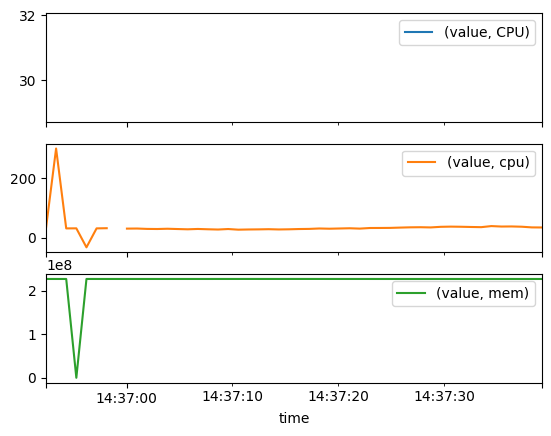

In [12]:
pd.pivot(df, index='time', columns='name').plot(subplots=True)

In [13]:
df.query('name == "cpu" & (value < 0 | value > 100)')

,time,name,value
3,2021-07-13 14:36:53.337,cpu,300.90
9,2021-07-13 14:36:56.208,cpu,-32.14


In [17]:
mem = df[df['name'] == 'mem']['value']
z_score = (mem - mem.mean())/mem.std()
bad_mem = mem[z_score.abs() > 2]

print('mem',mem)
print('z_score',z_score)
print('bad_mem',bad_mem)

mem 0     227517194.0
2     227519176.0
4     227515712.0
6           295.0
8     227531324.0
11    227528488.0
12    227515595.0
15    227525066.0
17    227531520.0
19    227508323.0
21    227519918.0
23    227523134.0
25    227517742.0
26    227526537.0
28    227514284.0
30    227528568.0
32    227516744.0
35    227538721.0
37    227537406.0
39    227543777.0
40    227555962.0
42    227548711.0
44    227547875.0
46    227540807.0
49    227547996.0
51    227556054.0
53    227551174.0
55    227552297.0
57    227536294.0
59    227529078.0
60    227534673.0
63    227532677.0
64    227529274.0
67    227517273.0
69    227506948.0
71    227497850.0
72    227493728.0
75    227495928.0
77    227512097.0
79    227518444.0
81    227499510.0
83    227507039.0
85    227496995.0
87    227496194.0
88    227509918.0
91    227501851.0
93    227493116.0
95    227498512.0
97    227492915.0
98    227496663.0
Name: value, dtype: float64
z_score 0     0.141285
2     0.141347
4     0.141239
6    -6.929645


In [18]:
# bad_mem
df.loc[bad_mem.index]

,time,name,value
6,2021-07-13 14:36:55.251,mem,295.0


In [19]:
df = pd.read_csv('cart.csv', parse_dates=['date'])
df

,date,name,amount,price
0,2021-03-01,carrot,7,5.73
1,2021-03-01,egg,12,1.70
2,2021-03-01,egg,12,1.20
3,2021-03-01,milk,1,3.57
4,2021-03-02,potato,3,2.17
5,2021-03-02,potato,3,2.17


In [20]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,True


In [21]:
df.duplicated(['date', 'name'])

,0
0,False
1,False
2,True
3,False
4,False
5,True


In [23]:
df = pd.read_csv('ships.csv')
df
# %%
df.dtypes

,0
name,object
lat,float64
lng,float64


In [26]:
pip install pandera

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 4.8 MB/s eta 0:00:00


In [ ]:
'''The Pandera library is used for data validation in pandas DataFrames.
It allows you to define schemas that specify the expected structure, types, and constraints of your data.
It's particularly helpful in data pipelines, testing, and ETL workflows to ensure data quality and consistency.

Main uses:
Validate DataFrames before processing them.
Enforce data types, column presence, ranges, regex patterns, nullability, etc.
Catch data errors early (e.g., in machine learning or data analysis workflows).
Document expected structure of data for collaboration and reproducibility.

'''

In [27]:
import pandera as pa
import numpy as np

schema = pa.DataFrameSchema({
    'name': pa.Column(pa.String),    #it fails because pandera doesnt allow null values
    'lat': pa.Column(pa.Float),
    'lng': pa.Column(pa.Float),
})

schema.validate(df)

/usr/local/lib/python3.11/dist-packages/pandera/_pandas_deprecated.py:146: FutureWarning: Importing pandas-specific classes and functions from the
top-level pandera module will be **removed in a future version of pandera**.
If you're using pandera to validate pandas objects, we highly recommend updating
your import:

```
# old import
import pandera as pa

# new import
import pandera.pandas as pa
```

If you're using pandera to validate objects from other compatible libraries
like pyspark or polars, see the supported libraries section of the documentation
for more information on how to import pandera:

https://pandera.readthedocs.io/en/stable/supported_libraries.html

To disable this warning, set the environment variable:

```
export DISABLE_PANDERA_IMPORT_WARNING=True
```

  warnings.warn(_future_warning, FutureWarning)


SchemaError: non-nullable series 'lat' contains null values:
3   NaN
Name: lat, dtype: float64

In [28]:
import pandera as pa
import numpy as np

schema = pa.DataFrameSchema({
    'name': pa.Column(pa.String),
    'lat': pa.Column(pa.Float, nullable=True),
    'lng': pa.Column(pa.Float,nullable = True),
})

schema.validate(df)

,name,lat,lng
0,Black Pearl,20.664865,-80.709747
1,Cobra,20.664868,-80.709740
2,Flying Dutchman,20.664878,-80.709941
3,Empress,NaN,NaN


In [29]:
df = pd.read_csv('ships.csv')
df

,name,lat,lng
0,Black Pearl,20.664865,-80.709747
1,Cobra,20.664868,-80.709740
2,Flying Dutchman,20.664878,-80.709941
3,Empress,NaN,NaN


In [30]:
df[df.isnull().any(axis=1)]
df.iloc[-1]['name']

'Empress'

In [31]:
df['name'] = df['name'].str.strip()
df.iloc[-1]['name']

'Empress'

In [32]:
df[df.isnull().any(axis=1)]

,name,lat,lng
3,Empress,NaN,NaN


In [33]:
import numpy as np
mask = df['name'].str.strip() == ''
df.loc[mask, 'name'] = np.nan

In [35]:
df[df.isnull().any(axis=1)]

,name,lat,lng
3,Empress,NaN,NaN


In [36]:
schema = pa.DataFrameSchema({
    'name': pa.Column(pa.String),
    'lat': pa.Column(
        pa.Float,
        nullable=True,
        checks=pa.Check(
            lambda v: v >= -90 and v <= 90,
            element_wise=True,
        ),
    ),
    'lng': pa.Column(
        pa.Float,
        nullable=True,
        checks=pa.Check(
            lambda v: v >= -180 and v <= 180,
            element_wise=True,
        ),
    ),
})

schema.validate(df)

,name,lat,lng
0,Black Pearl,20.664865,-80.709747
1,Cobra,20.664868,-80.709740
2,Flying Dutchman,20.664878,-80.709941
3,Empress,NaN,NaN


In [37]:
df = pd.read_csv('heights.csv')
df

,name,grade,height
0,Adam,1,31.7
1,Beth,1,74.9
2,Chris,12,72.3
3,Dana,12,61.8


In [38]:
max_heights = pd.DataFrame([
[1, 32],
], columns=['grade', 'max_height'])
max_heights

,grade,max_height
0,1,32


In [39]:
mdf = pd.merge(df, max_heights, how='left')
mdf

,name,grade,height,max_height
0,Adam,1,31.7,32.0
1,Beth,1,74.9,32.0
2,Chris,12,72.3,NaN
3,Dana,12,61.8,NaN


In [40]:
df[mdf['height'] > mdf['max_height']]

,name,grade,height
1,Beth,1,74.9


In [41]:
#assignment

df = pd.read_csv('rides.csv')
df
# %%
# Find out all the rows that have bad values
# - Missing values are not allowed
# - A plate must be a combination of at least 3 upper case letters or digits
# - Distance much be bigger than 0

,name,plate,distance
0,Gomez,1XZ2,3.70
1,Morticia,NaN,2.10
2,Fester,,3.40
3,Lurch,Q38X3,-3.20
4,NaN,03A,14.30
5,Wednesday,A,0.30
6,Pugsley,ZF003,153.14


In [42]:
# %%
# Find out all the rows that have bad values
# - Missing values are not allowed
# - A plate must be a combination of at least 3 upper case letters or digits
# - Distance much be bigger than 0
null_mask = df.isnull().any(axis=1)
df[null_mask]
# %%
plate_mask = ~df['plate'].str.match(r'^[0-9A-Z]{3,}', na=False)
df[plate_mask]

# %%
dist_mask = df['distance'] < 0
df[dist_mask]
# %%
mask = null_mask | plate_mask | dist_mask
df[mask]

,name,plate,distance
1,Morticia,NaN,2.1
2,Fester,,3.4
3,Lurch,Q38X3,-3.2
4,NaN,03A,14.3
5,Wednesday,A,0.3


In [44]:
pip install invoke

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.3/160.3 kB 2.9 MB/s eta 0:00:00


In [59]:
import sqlite3
import pandas as pd
from invoke import task
from IPython.display import display # Import display for better output

def load_csv(csv_file):
    # Ensure 'rides.csv' has columns named 'start' and 'end'
    # If the column names are different, update the parse_dates list below
    # Updated to parse 'date' column for cart.csv
    df = pd.read_csv(csv_file, parse_dates=['date'])
    return df

# The original validate function was causing an error with the 'date' column
# and didn't perform the intended validation logic for 'cart.csv'.
# Removing the validate function call for now.
# If date validation is needed for 'cart.csv', implement it here.
# def validate(df):
    # This validation checks if start time is before end time, which requires
    # 'start' and 'end' to be parsed as datetime objects
    # This logic is not applicable to cart.csv as written.
    # bad_time = df.query('date')
    # if len(bad_time) > 0:
        # Display the bad rows for debugging
        # display(bad_time)
        # raise ValueError("Validation failed: 'start' time must be before 'end' time for the rows shown above.")

# Make sure 'rides.csv' has columns named 'start' and 'end' in the correct format
# Using 'cart.csv' as specified in the code.
csv_file = 'cart.csv'

# Load the CSV file
df = load_csv(csv_file)

# Validate the data - Skipped for now as the original validate caused issues
# validate(df)

# Define the database file name
db_file = 'cart.db'

# Connect to the SQLite database (it will be created if it doesn't exist)
conn = sqlite3.connect(db_file)

# Write the DataFrame to a SQL table named 'rides'
# Use replace if you want to overwrite the table each time, or append to add to it
df.to_sql('cart', conn, index=False, if_exists='replace')

# Close the database connection
conn.close()

print("🎉 ETL complete.")

# Now read the data from the created table to verify
conn = sqlite3.connect("cart.db")
df_from_db = pd.read_sql("SELECT * FROM cart", conn)
print("\nData loaded from database:")
display(df_from_db) # Use display for better formatting in Jupyter
conn.close() # Close the connection after reading

🎉 ETL complete.

Data loaded from database:


,date,name,amount,price
0,2021-03-01 00:00:00,carrot,7,5.73
1,2021-03-01 00:00:00,egg,12,1.70
2,2021-03-01 00:00:00,egg,12,1.20
3,2021-03-01 00:00:00,milk,1,3.57
4,2021-03-02 00:00:00,potato,3,2.17
5,2021-03-02 00:00:00,potato,3,2.17


In [60]:
# %%
import pandas as pd

df = pd.read_csv('orders.csv', parse_dates=['time'])
df

# %%
def is_valid_row(row):
    if row['time'] < pd.Timestamp('1900'):
        return False

    if pd.isnull(row['symbol']) or row['symbol'].strip() == '':
        return False

    if row['price'] <= 0:
        return False

    return True


ok_df = df[df.apply(is_valid_row, axis=1)]

# %%
num_bad = len(df) - len(ok_df)
percent_bad = num_bad/len(df) * 100
print(f'{percent_bad:.2f}% bad rows')
if num_bad > 0:
    bad_rows = df[~df.index.isin(ok_df.index)]
    print('bad rows:')
    print(bad_rows)

5.00% bad rows
bad rows:
                  time symbol       price side
16 2027-06-01 08:06:32    NaN  265.443295  ask


In [ ]:
"""
Load traffic.csv into "traffic" table in sqlite3 database.

Drop and report invalid rows.
- ip should be valid IP (see ipaddress)
- time must not be in the future
- path can't be empty
- status code must be a valid HTTP status code (see http.HTTPStatus)
- size can't be negative or empty

Report the percentage of bad rows. Fail the ETL if there are more than 5% bad rows
"""

In [64]:
"""
Load traffic.csv into "traffic" table in sqlite3 database.

Drop and report invalid rows.
- ip should be valid IP (see ipaddress)
- time must not be in the future
- path can't be empty
- status code must be a valid HTTP status code (see http.HTTPStatus)
- size can't be negative or empty

Report the percentage of bad rows. Fail the ETL if there are more than 5% bad rows
"""
import sqlite3
from contextlib import closing
from http import HTTPStatus
from ipaddress import ip_address

import pandas as pd
import numpy as np

status_codes = set(HTTPStatus)

max_bad_percent = 5


def is_valid_row(row):
    # ip should be valid IP (see ipaddress)
    try:
        ip_address(row['ip'])
    except ValueError:
        return False

    # time must not be NaT (couldn't be parsed)
    # Changed pd.isnat to pd.isna
    if pd.isna(row['time']):
        return False

    # time must not be in the future
    now = pd.Timestamp.now()
    if row['time'] > now:
        return False

    # path can't be empty
    if pd.isnull(row['path']) or not row['path'].strip():
        return False

    # status code must be a valid HTTP status code (see http.HTTPStatus)
    # Convert status to integer before checking if it's in the set of HTTPStatus values
    try:
        status_int = int(row['status'])
    except ValueError:
        return False # Not a valid number
    if status_int not in status_codes:
        return False

    # size can't be negative or empty
    if pd.isnull(row['size']) or row['size'] < 0:
        return False

    return True


def etl(csv_file, db_file):
    # Read the CSV without the 'errors' keyword in read_csv
    df = pd.read_csv(csv_file)

    # Manually parse the 'time' column with errors='coerce'
    df['time'] = pd.to_datetime(df['time'], errors='coerce')

    bad_rows = df[~df.apply(is_valid_row, axis=1)]
    if len(bad_rows) > 0:
        percent_bad = len(bad_rows)/len(df) * 100
        print(f'{len(bad_rows)} ({percent_bad:.2f}%) bad rows')
        if percent_bad >= max_bad_percent:
            raise ValueError(f'too many bad rows ({percent_bad:.2f}%)')

    # Filter out the bad rows before saving to the database
    df_cleaned = df[df.apply(is_valid_row, axis=1)].copy()

    with closing(sqlite3.connect(db_file)) as conn:
        conn.execute('BEGIN')
        with conn:
            df_cleaned.to_sql('traffic', conn, if_exists='replace', index=False)

if __name__ == '__main__':
    etl('traffic.csv', 'traffic.db')

6 (4.69%) bad rows


In [65]:
# %%
import pandas as pd

df = pd.read_csv('weather.csv', parse_dates=['DATE'])
df
# %%
df.rename(columns={
    'DATE': 'date',
    'TMIN': 'min_temp',
    'TMAX': 'max_temp',
}, inplace=True)
df
# %%
df = pd.read_csv('donations.csv')
df
# %%
import re


def fix_col(col):
    """Fix column name
    >>> fix_col('1. First Name')
    'first_name'
    """
    return (
        re.sub(r'\d+\.\s+', '', col)
        .lower()
        .replace(' ', '_')
    )

df.rename(columns=fix_col, inplace=True)
df

,first_name,last_name,donation_amount
0,Amy,Wang,200
1,Bender,Rodriguez,12
2,Philip,Fry,70


In [66]:
# %%
import pandas as pd

df = pd.read_csv('points.csv')
df.dtypes

# %%
def asint(val):
    return int(val, base=0)

df['color'] = df['color'].apply(asint)
df.dtypes

# %%
bools = {
    'yes': True,
    'no': False,
}
df['visible'] = df['visible'].map(bools)
df.dtypes

# %%
df

,x,y,color,visible
0,1,1,16711680,True
1,2,2,65280,False
2,3,3,255,True


In [67]:
# %%
import pandas as pd

csv_file = '2021-06.csv'

df = pd.read_csv(csv_file)
df
# %%
df['date'] = csv_file[:-len('.csv')]
df

# %%
times = df['time'].str.split('-', expand=True)
times.columns = ['start', 'end']
times
# %%
df = pd.concat([df, times], axis=1)
df

# %%
df['start'] = pd.to_datetime(
    df['date'].str.cat(df['start'], sep='T')
)
df['end'] = pd.to_datetime(
    df['date'].str.cat(df['end'], sep='T')
)
df

# %%
(df['end'] - df['start']).sum()

<ipython-input-67-8797fff4c75f>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start'] = pd.to_datetime(
<ipython-input-67-8797fff4c75f>:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['end'] = pd.to_datetime(


Timedelta('0 days 23:00:00')

In [68]:
# %%

import pandas as pd

df = pd.read_csv('rides.csv')
df

# %%
mask = df.eval('name.isnull() | distance <= 0')
mask

# %%
df = df[~mask]
df

,name,plate,distance
0,Gomez,1XZ2,3.70
1,Morticia,NaN,2.10
2,Fester,,3.40
5,Wednesday,A,0.30
6,Pugsley,ZF003,153.14


In [69]:
# %%
import pandas as pd


df = pd.read_csv('cart.csv', parse_dates=['date'])
df

# %%
df['amount'].fillna(1, inplace=True)
df

# %%
most_common = df['name'].mode()[0]
df['name'].fillna(most_common, inplace=True)
df

# %%
df['date'].fillna(method='ffill', inplace=True)
df

# %%
import numpy as np
prices = df.groupby('name')['price'].transform(np.mean)
prices

# %%
df['price'].fillna(prices, inplace=True)
df

<ipython-input-69-95be967dafdb>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['amount'].fillna(1, inplace=True)
<ipython-input-69-95be967dafdb>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

,date,name,amount,price
0,2021-03-01,carrot,7,5.73
1,2021-03-01,egg,12,1.70
2,2021-03-01,egg,12,1.20
3,2021-03-01,milk,1,3.57
4,2021-03-02,potato,3,2.17
5,2021-03-02,potato,3,2.17


In [72]:
# %%
import pandas as pd

df = pd.read_csv('metrics.csv', parse_dates=['time'])
df
# %%

df = pd.melt(
    df,
    value_vars=['cpu', 'memory'],
    id_vars=['time'],
    var_name='metric',
    # Renaming the value column to avoid conflict with the existing 'value' column
    value_name='metric_value',
)
df

,time,metric,metric_value
0,2021-07-23 14:33:04,cpu,30.20
1,2021-07-23 14:44:05,cpu,32.90
2,2021-07-23 14:55:06,cpu,37.10
3,2021-07-23 14:33:04,memory,571.83
4,2021-07-23 14:44:05,memory,524.72
5,2021-07-23 14:55:06,memory,617.90


In [73]:
# %%
import pandas as pd

df = pd.read_csv('workshops.csv')
df
# %%
"""
Fix the data frame. At the end, row should have the following columns:
- start: pd.Timestemap
- end: pd.Timestamp
- name: str
- topic: str (python or go)
- earnings: np.float64
"""

'\nFix the data frame. At the end, row should have the following columns:\n- start: pd.Timestemap\n- end: pd.Timestamp\n- name: str\n- topic: str (python or go)\n- earnings: np.float64\n'

In [75]:
# %%
import pandas as pd

df = pd.read_csv('workshops.csv')
df

# %% Fill Year & Month
"""
Fix the data frame. At the end, row should have the following columns:
- start: pd.Timestemap
- end: pd.Timestamp
- name: str
- topic: str (python or go)
- earnings: np.float64
"""
df['Year'].fillna(method='ffill', inplace=True)
df['Month'].fillna(method='ffill', inplace=True)
df

# %% Drop year & month rows
df = df[pd.notnull(df['Earnings'])].copy()
df

# %%
def as_date(row, col):
    year = int(row['Year'])
    month = row['Month']
    day = int(row[col])
    ts = f'{month} {day}, {year}'
    return pd.to_datetime(ts, format='%B %d, %Y')

df['start'] = df.apply(as_date, axis=1, args=('Start',))
df['end'] = df.apply(as_date, axis=1, args=('End',))
df

# %% Extract topic
def topic(name):
    if 'go' in name:
        return 'go'
    if 'python' in name:
        return 'python'

df['topic'] = df['Name'].str.lower().apply(topic)
df

# %% Earnings
import numpy as np
# Use errors='coerce' in to_numeric to handle potential parsing issues gracefully
df['earnings'] = pd.to_numeric(
    df['Earnings'].str.replace(r'[$,]', '', regex=True), # Use regex=True for clarity with string replacement
    errors='coerce'
).astype(np.float64)
df

# Check for any rows where conversion resulted in NaN
if df['earnings'].isnull().any():
    print("Rows with invalid earnings after conversion:")
    print(df[df['earnings'].isnull()])


# %% Cleanup
df = df[['start', 'end', 'Name', 'topic', 'earnings']]
df.rename(columns={'Name': 'name'}, inplace=True)
df

<ipython-input-75-8d650047aedd>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(method='ffill', inplace=True)
<ipython-input-75-8d650047aedd>:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Year'].fillna(method='ffill', inplace=True)
<ipython-input-75-8d650047aedd>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will

,start,end,name,topic,earnings
2,2021-06-01,2021-06-03,gRPC in Go,go,33019.0
3,2021-06-07,2021-06-10,Optimizing Python,python,42238.0
4,2021-06-28,2021-06-30,python Foundations,python,24372.0
6,2021-07-05,2021-07-08,go concurrency,go,46382.0
7,2021-07-21,2021-07-22,Writing Secure Go,go,27038.0
